# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Lecture 12 </span>

Use of deep NNs, implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9), read from the MNIST dataset. MNIST comprises $70000$ digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. 

##  <span style="color:blue"> Exercise 12.2

In [9]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()

# reshape data, it could depend on Keras backend
#X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

print('After 1st reshaping: X_train shape:', X_train.shape)
print('After 1st reshaping: Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

After 1st reshaping: X_train shape: (60000, 28, 28)
After 1st reshaping: Y_train shape: (60000,)


In [10]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)


X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Dense(10, activation='relu'))
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    # apply MaxPooling2D
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    #apply Flatten
    model.add(Flatten())
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    
    print('Model compiled successfully and ready to be trained.')
    return model

# create the deep conv net
model_CNN=create_CNN()

Model compiled successfully and ready to be trained.


In [13]:
# training parameters
batchsize = 32
N_epochs = 10

# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batchsize,
          epochs=N_epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.5468 - accuracy: 0.8244 - val_loss: 0.1367 - val_accuracy: 0.9614
Epoch 2/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1847 - accuracy: 0.9442 - val_loss: 0.0885 - val_accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.1430 - accuracy: 0.9565 - val_loss: 0.0731 - val_accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.1238 - accuracy: 0.9620 - val_loss: 0.0617 - val_accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.1090 - accuracy: 0.9673 - val_loss: 0.0586 - val_accuracy: 0.9818
Epoch 6/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1024 - accuracy: 0.9688 - val_loss: 0.0523 - val_accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0925 - accuracy: 0.9721 - val_loss: 0.0

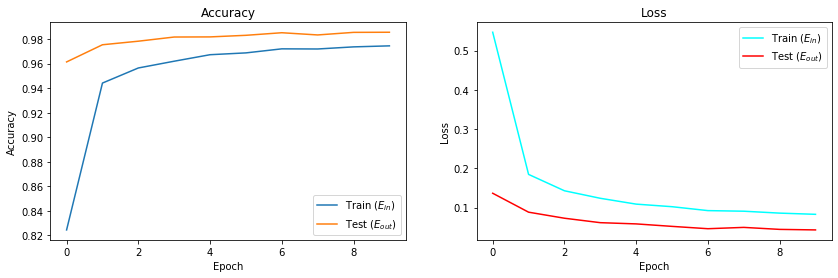

In [14]:
plt.figure(figsize=(14,4))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train ($E_{in}$)', 'Test ($E_{out}$)'], loc='best')
plt.title("Accuracy")

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'],color='cyan')
plt.plot(history.history['val_loss'],color='red')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train ($E_{in}$)', 'Test ($E_{out}$)'], loc='best')
plt.title("Loss")

plt.show()

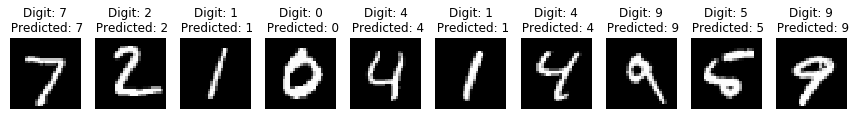

In [15]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
#print(X_test.shape)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\n Predicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

The CNN allows to improve performances wrt to the DNN in Exercise 12.1 (same epochs, 10) in terms of accuracy and loss:

* Accuracy: CNN 0.9856, DNN 0.9656
* Loss: CNN 0.0433, DNN 0.1090

This comparison refers to the same optimizer (*sgd*) but actually our sgd-CNN performs better than the same DNN with more suitable optimizers (*adam*, *nadam*, accuracy $\simeq$ 0.981 and loss $\simeq$ 0.09).

##  <span style="color:blue"> Exercise 12.3

Image size: 28x28
Data shape:  (28, 28)


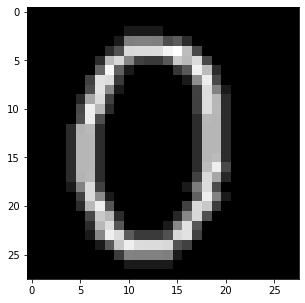

Digit predicted: 0


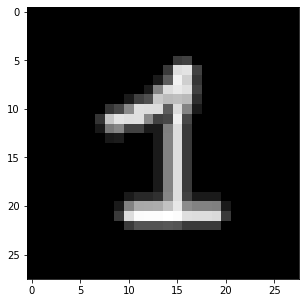

Digit predicted: 1


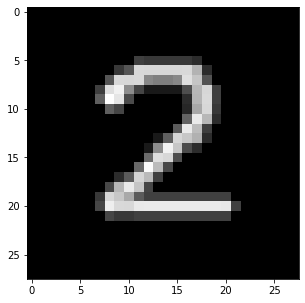

Digit predicted: 2


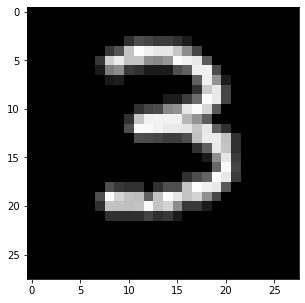

Digit predicted: 3


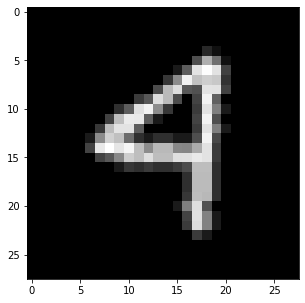

Digit predicted: 4


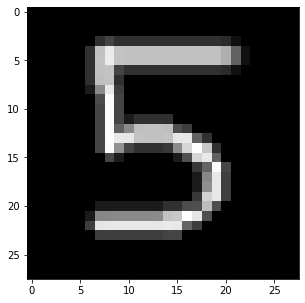

Digit predicted: 5


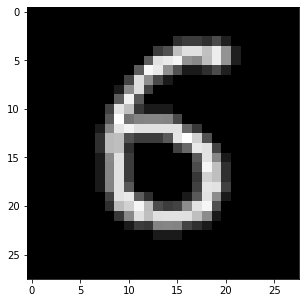

Digit predicted: 6


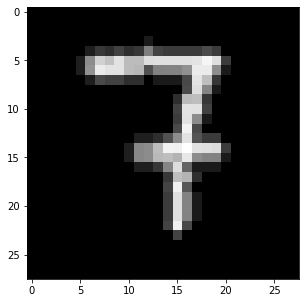

Digit predicted: 3


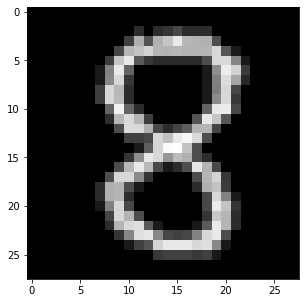

Digit predicted: 8


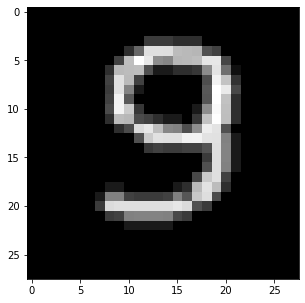

Digit predicted: 3


In [16]:
from PIL import Image
import os

pred=[]
v_data=np.array([])
for k in range(num_classes):
    digit_filename = "./Digits/"+str(k)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    if(k==0):
        print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    if(k==0):
        print("Data shape: ",data.shape)
    plt.figure(figsize=(5,5))
    plt.imshow(data, cmap='gray')
    plt.show()

    data = data.reshape(xdim,ydim,1)
    #print(data.shape)
    v_data=np.array([data])
    pred_0 = model_CNN.predict(v_data)

    data = data.reshape(xdim,ydim)

    print("Digit predicted: {}".format(np.argmax(pred_0)))

8 digits out of 10 are correctly predicted, exceptions being 7 ($\rightarrow$ 3) and 9 ($\rightarrow$ 3).